# 데이터 구성

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


In [425]:
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
#시각화를 위한 seaborn, matplotlib.pyplot을 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [426]:
df = pd.read_csv('diabetes.csv')
df.shape #데이터의 개수 768의 행 9개의 컬럼

(768, 9)

In [427]:
df.head() #Outcome이 예측해야할 데이터/ 다 숫자로 되어있어서 따로 전처리 필요없음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 수치형 변수를 범주형 변수로 만들기.

In [428]:
df['Pregnancies_high'] = df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

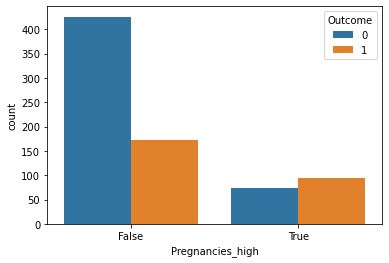

In [429]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

In [430]:
#One-Hot-Encoding
#수치데이터를 범주화하고 다시 수치데이터로 바꿈.
#보통은 범주데이터를 수치 데이터로 바꿀때 원핫인코딩 사용

# df["Age_low"] = df["Age"] < 25
# df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
# df["Age_high"] = df["Age"] > 60
# df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

In [431]:
# sns.countplot(data=df, x="Age_low", hue="Outcome")

In [432]:
# sns.countplot(data=df, x="Age_middle", hue="Outcome")

In [433]:
# sns.countplot(data=df, x="Age_high", hue="Outcome")

In [434]:
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


In [435]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [436]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [437]:
df["Insulin_nan"].isnull().sum()

374

In [438]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [439]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [440]:
# df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 68.7
# df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 100.3

In [441]:
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

<AxesSubplot:xlabel='Insulin'>

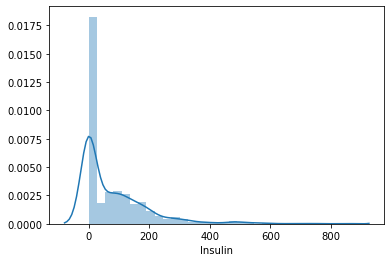

In [442]:
sns.distplot(df['Insulin'])
#0쪽에 치우쳐져 있음.

<AxesSubplot:xlabel='Insulin'>

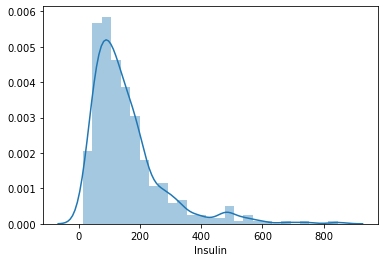

In [443]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])
#0보다 큰 인슐린 값만 가져와본다.
#여전히 한쪽으로 치우쳐져있고 뾰족하다.

In [444]:
# 이를 왜도, 첨도라고 한다.
# 왜도는 한쪽으로 치우쳐져 있는 정도, 첨도는 뾰족한 정도를 나타낸다.

<AxesSubplot:xlabel='Insulin'>

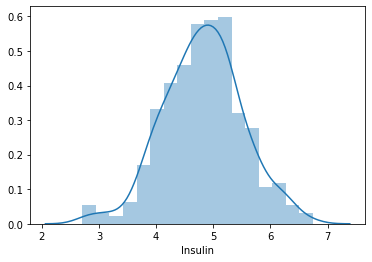

In [445]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))
# 로그를 씌우면 약간 정규분포의 형태로 만들어진다. 
# 로그를 적용할 때 1같은 작은 값들을 더해준다. 0 이하의 마이너스 값들은 음의 무한대 값에 수렴하기 때문이다.

In [446]:
#한쪽으로 데이터가 몰려있을 때보다 정규분포를 이룰 때 머신러닝이나 딥러닝 알고리즘은 좀 더 좋은 성능을 낸다.

<AxesSubplot:xlabel='Insulin_nan'>

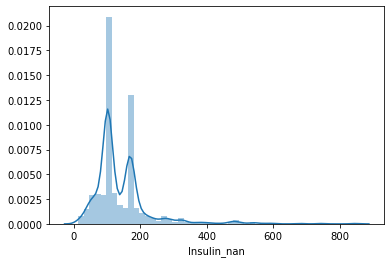

In [447]:
sns.distplot(df["Insulin_nan"])
#중앙값으로 채워줬기 때문에 두개의 뾰족한 부분이 있다. 
#이 값도 왼쪽으로 치우쳐져 있음.

<AxesSubplot:xlabel='Insulin_log'>

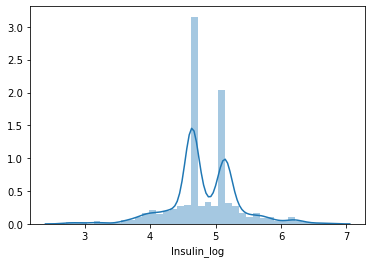

In [448]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])
#역시 로그를 적용해줌.
#인슐린 로그라는 컬럼을 생성해줌

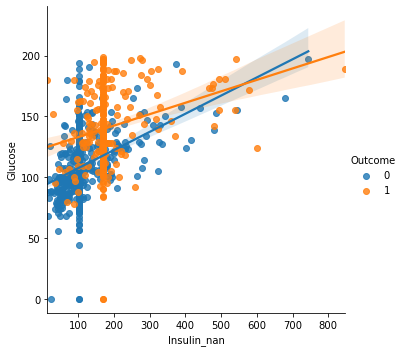

In [449]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")
#100보다 작은 값에서 발병이 잘 안일어나는 것을 볼 수 있다.
#한줄로 생성된 값들은 우리가 채워준 값. 중앙값

In [450]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()
#102.5 = 발병하지 않을 때 채워준 인슐린nan 값
#and가 아닌 &을 쓰고, ()로 연산자 우선 순위를 지정해주어야 오류가 나지 않습니다.
# 인슐린과 글루코스의 상관계수로 파생변수 low_glu_insulin을 만들었습니다.

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [451]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])
# crosstab = 범주형 데이터에 대해 cross table을 출력해줌.
#5를 볼 때, 글루코스가 100보다 작고 인슐린이 102.5보다 작을 때 발병할 확률이 현저히 낮다는 것을 알 수 있음.

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치 다루기

<AxesSubplot:xlabel='Insulin_nan'>

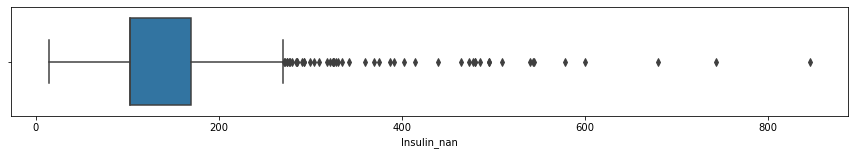

In [452]:
#이상치를 확인하기 위해 상자수염그림을 그립니다.
#상자수염그림은 이상치 파악하고자 할 때 사용하는 시각화 기법
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_nan"])

In [453]:
#결측치 처리한 값 = insulin_nan
#600이상 보면 이상치가 몇 개 있다.

In [454]:
df["Insulin_nan"].describe()
#max 값과 75% 값이 차이가 크다. 25% 50% 같다 = 우리가 중앙값으로 채워줬기 때문.

#25%와 50%가 같은 이유는 null 값을 중앙값으로 채워줬기 때문입니다.

# max 값이 크기 때문에 평균값이 높아 보입니다. 

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [455]:
#사분위수 범위(IQR, Q3 - Q1)를 계산한다.
#3사분위 수 0.75
#1사분위 수 0.25
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [456]:
# Q3보다 1.5IQR 이상 초과하는 값과 Q1보다 1.5IQR 이상 미달하는 값은 점이나, 원, 별표등으로 따로 표시한다(이상치 점).

In [457]:
OUT = IQR3 + (IQR * 1.5)
OUT
#상자수염박스로 본 outlier 값

270.0

In [458]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [459]:
#51개 .. 다 제거하기에는 너무 많은 값.

In [460]:
train[train["Insulin_nan"]>600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin


In [461]:
#600개 이상은 3개.. 이것만 제거해본다.

# CSV 파일로 저장하기

In [463]:
df.to_csv("diabetes_feature.csv", index=False)

In [465]:
pd.read_csv("diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습, 예측 데이터셋 나누기

In [397]:
#8:2의 비율로 구하기 위해 전체 데이터 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 저장.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [398]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.
train = df[:split_count].copy()
train.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
609,1,111,62,13,182,24.0,0.138,23,0,False,True,False,False,182.0,5.209486,False
610,3,106,54,21,158,30.9,0.292,24,0,False,True,False,False,158.0,5.068904,False
611,3,174,58,22,194,32.9,0.593,36,1,False,False,True,False,194.0,5.273000,False
612,7,168,88,42,321,38.2,0.787,40,1,True,False,True,False,321.0,5.774552,False
613,6,105,80,28,0,32.5,0.878,26,0,False,True,False,False,102.5,4.639572,False


In [399]:
train.shape #614개의 행과 9개의 컬럼

(614, 16)

In [424]:
train = train[train["Insulin_nan"] < 600]
train.shape

(607, 16)

In [401]:
test = df[split_count:].copy()
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
614,11,138,74,26,144,36.1,0.557,50,1,True,False,True,False,144.0,4.976734,False
615,3,106,72,0,0,25.8,0.207,27,0,False,True,False,False,102.5,4.639572,False
616,6,117,96,0,0,28.7,0.157,30,0,False,False,True,False,102.5,4.639572,False
617,2,68,62,13,15,20.1,0.257,23,0,False,True,False,False,15.0,2.772589,True
618,9,112,82,24,0,28.2,1.282,50,1,True,False,True,False,169.5,5.138735,False


In [402]:
test.shape #154개의 행과 9개의 컬럼

(154, 16)

# 학습, 예측에 사용할 컬럼

In [403]:
#feature_names라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다. - Outcome 컬럼 제외한 모든 컬럼
#tolist : list 타입으로 가져온다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
# feature_names.remove('Insulin_nan')

feature_names.remove('Insulin_log') #로그값 제거

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

# 정답값이자 예측해야 될 값

In [404]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.
#feature_names는 여러개의 칼럼을 가져오기 때문에 리스트 형태로 가져오고 label_name은 하나의 값이기 때문에 리스트 X
label_name = 'Outcome'
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [405]:
#학습 세트 만들기
# train[feature_names] = feature_name에 해당되는 컬럼만 가져옴
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(607, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [406]:
#정답 값을 만든다.
y_train = train[label_name]
print(y_train.shape)
y_train.head()
#학습 세트와 정답의 행의 개수가 동일해야함. 614개로 동일

(607,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [407]:
# X_train은 행렬, y_train은 벡터 형태이다.

In [408]:
#예측에 사용할 데이터세트를 만든다.
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [409]:
#예측의 정답값
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [410]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

# 학습(훈련)

In [411]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측

In [412]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 트리 알고리즘  분석하기

In [413]:
from sklearn.tree import plot_tree

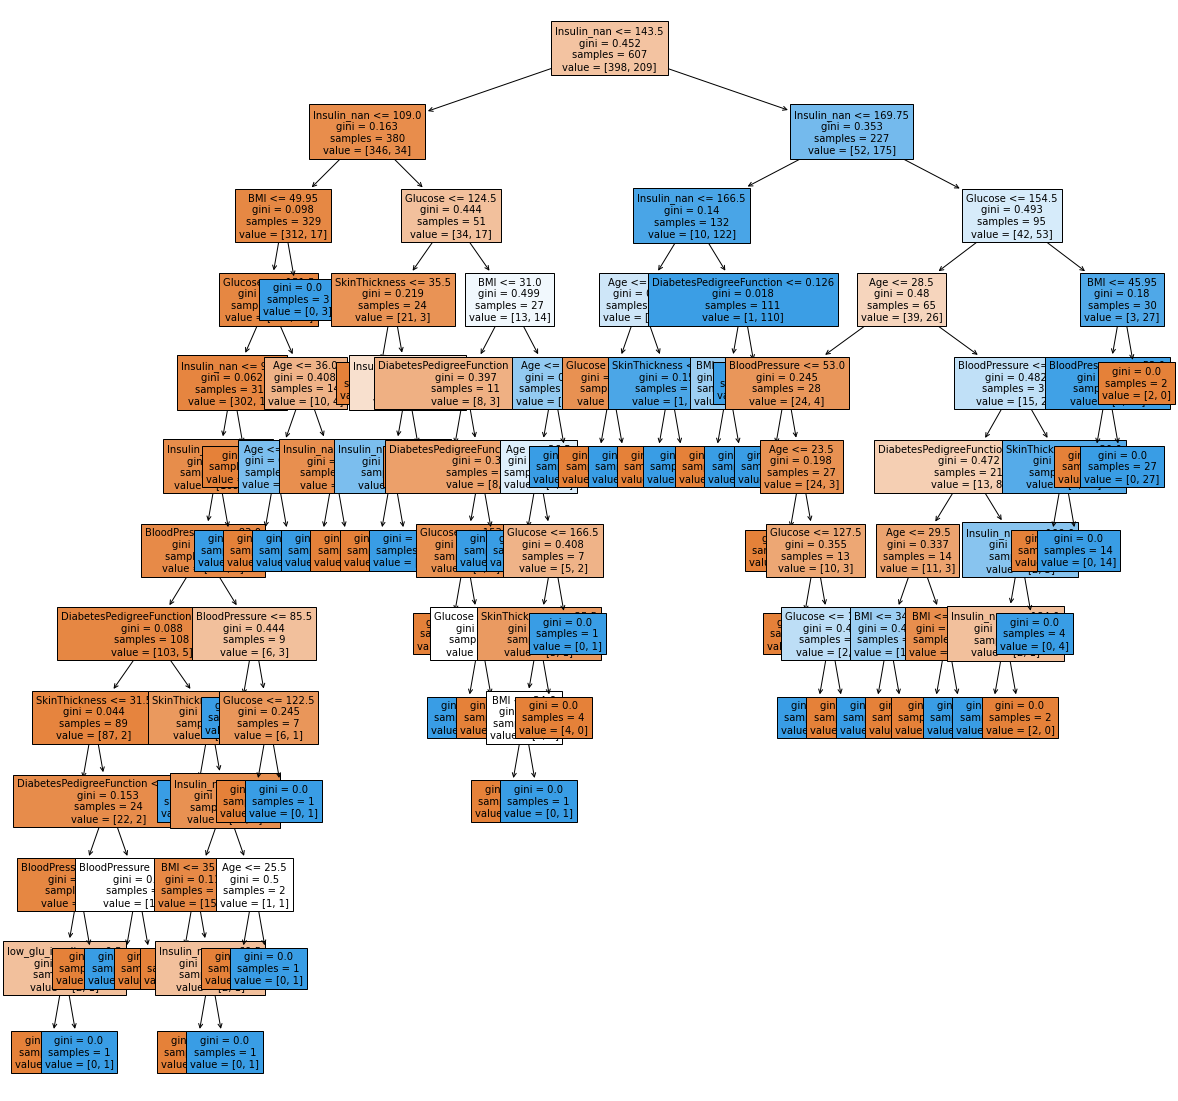

In [414]:
plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names = feature_names,
                 filled=True,
                 fontsize=10)

In [415]:
#글루코스가 학습에서 가장 중요한 역할을 하고 있음.

In [416]:
model.feature_importances_

array([0.09850681, 0.04785492, 0.03488798, 0.06270676, 0.02517446,
       0.08899905, 0.        , 0.63700519, 0.00486483])

<AxesSubplot:>

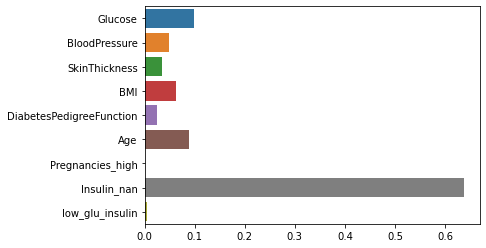

In [417]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [418]:
#Pregnancies_high는 중요한 역할을 하지 않음.

# 정확도(Accuracy) 측정하기

In [419]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나온다.
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
#전체적으로 틀린 개수가 39개
#나이 25세 기준 = 38개
#나이 30세 기준 = 51개

diff_count = abs(y_test - y_predict).sum()
diff_count

16

In [420]:
#예측의 정확도를 구한다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됨.
(len(y_test) - diff_count) / len(y_test) * 100

89.6103896103896

In [421]:
diff_count = abs(y_test - y_predict).sum()
print(diff_count)
(len(y_test) - diff_count) / len(y_test) * 100

16


89.6103896103896

In [422]:
#인슐린과 글루코스 상관관계로 파생변수 생성 => 90% 정확도 생성.

In [423]:
# 500으로 바꿔주니 정확도가 오히려 떨어졌다. 다시 600으로 변경
# 인슐린 수치 600이상 이상치 제거 -> 15개 90%